In [7]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [9]:
from data_loading import load_data_using_sqlalchemy
from user_engagement import (
    aggregate_user_metrics,
    normalize_metrics,
    determine_optimal_clusters,
    cluster_users,
    calculate_cluster_metrics,
    aggregate_application_usage,
    plot_top_applications
)

In [10]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [11]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df =  load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


Successfully loaded the data


In [12]:
# Step 2: Aggregate user engagement metrics
user_engagement = aggregate_user_metrics(df)


In [13]:
# Step 3: Normalize metrics for clustering
columns_to_normalize = ['Session Duration (s)', 'Total Traffic (Bytes)']
user_engagement_normalized = normalize_metrics(user_engagement, columns_to_normalize)

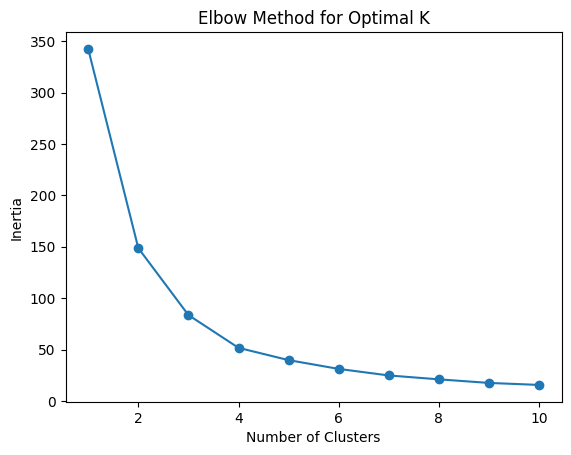

In [14]:
# Step 4: Determine the optimal number of clusters
determine_optimal_clusters(user_engagement_normalized, columns_to_normalize)

In [15]:
# Step 5: Cluster users into engagement groups
optimal_k = 3  # Based on the elbow method
user_engagement_clustered = cluster_users(user_engagement_normalized, columns_to_normalize, n_clusters=optimal_k)

In [16]:
# Step 6: Calculate metrics for each cluster
cluster_metrics = calculate_cluster_metrics(
    user_engagement_clustered, 'Engagement Cluster', columns_to_normalize
)
print(cluster_metrics)

  Engagement Cluster Session Duration (s)                                  \
                                      min       max      mean         sum   
0                  0         0.000000e+00  0.084640  0.005461  273.353870   
1                  1         2.156728e-07  0.170796  0.007133  338.659986   
2                  2         8.531477e-04  1.000000  0.020266  188.977296   

  Total Traffic (Bytes)                                   
                    min       max      mean          sum  
0              0.000000  0.062926  0.034468  1725.270390  
1              0.061263  0.150461  0.090933  4317.239045  
2              0.143204  1.000000  0.207202  1932.160933  


In [17]:
# Step 7: Aggregate application usage
application_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                       'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
application_traffic = aggregate_application_usage(df, application_columns)


c:\Users\hp\Desktop\week2\week-2_tenx\scripts\user_engagement.py:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Application', y='Traffic', data=top_users, ci=None)


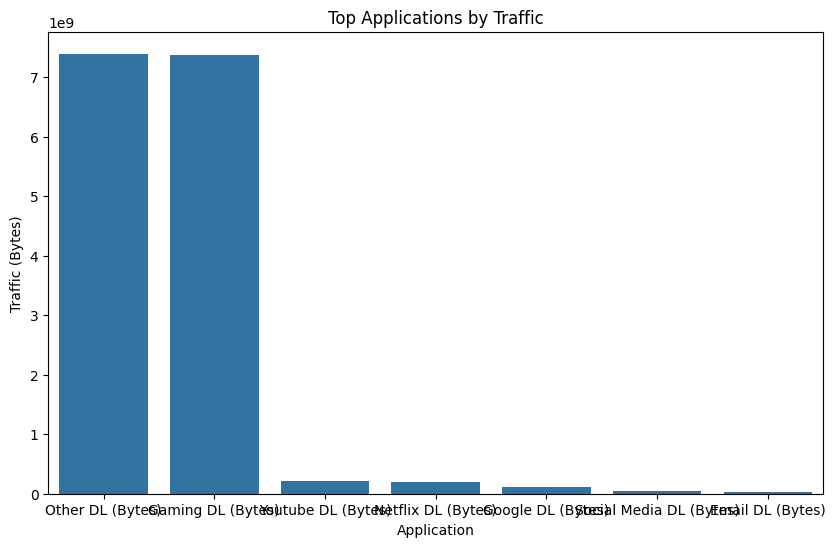

In [18]:
# Step 8: Plot the top 3 most used applications
plot_top_applications(application_traffic, top_n=3)